# Tracking

There are various tracking library we can use to link object over time in order to define trajectories.


## Bayesian tracker 

The first tracker that we will test is the BayesianTracker https://github.com/quantumjot/BayesianTracker .

Reference:
Automated deep lineage tree analysis using a Bayesian single cell tracking approach, Ulicna K, Vallardi G, Charras G and Lowe AR., bioRxiv (2020), https://www.biorxiv.org/content/early/2020/09/10/2020.09.10.276980

Installation
We can install the package using ```pip install btrack```

Let's try a first example

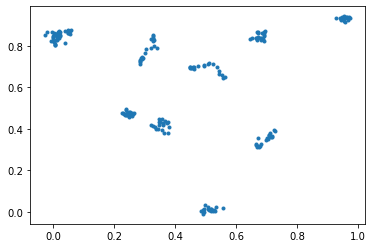

In [1]:
import btrack
import numpy as np
import matplotlib.pyplot as plt

# We define a list of positions we want to track later
num_objects = 10 # number of objects
num_frame = 20 # number of time points
pts = [] # list of set of coordinates
for k in range(num_frame):
    if k==0:
        pts.append(np.hstack([np.random.rand(10,2), np.zeros((10,1))]))
    else:
        pts.append(pts[k-1]+np.hstack([0.01*np.random.randn(10,2), np.ones((10,1))]))
        
localizations = np.concatenate(pts)
plt.plot(localizations[:,0], localizations[:,1],'.')

In [2]:
# Download a generic motion model to use with btrack
from urllib.request import urlretrieve
url = 'https://raw.githubusercontent.com/quantumjot/BayesianTracker/7d80399db64af4723c1da2381a22d9910e1ba7c8/models/cell_config.json'
config = '../scratch/cell_config.json'
urlretrieve(url, config)

('../scratch/cell_config.json', <http.client.HTTPMessage at 0x7f91d9312340>)

In [4]:
# Convert the numpy localization as PyTrackObjects
objects = btrack.dataio.objects_from_array(localizations, ['x', 'y', 't'])

with btrack.BayesianTracker() as tracker:
    # load the configuration file
    tracker.configure_from_file(config)
    # add the objects to the tracker
    tracker.append(objects)
    tracker.volume=((-0.5, 1.5), (-0.5, 1.5), (-1e5, 1e5))
    # tracl objects
    tracker.track_interactive(step_size=1)
    # run the global optimizer
    tracker.optimize()
    # tracks as a python list
    tracks = tracker.tracks
    # get tracks formated for napari
    data, properties, graph = tracker.to_napari(ndim=2)

[INFO][2021/07/07 02:30:36 PM] Loaded btrack: /home/jeromeb/miniconda3/envs/imaging/lib/python3.9/site-packages/btrack/libs/libtracker.so


[INFO][2021/07/07 02:30:36 PM] btrack (v0.4.1) library imported


[INFO][2021/07/07 02:30:36 PM] Setting max XYZ search radius to: 100


[INFO][2021/07/07 02:30:36 PM] Starting BayesianTracker session


[INFO][2021/07/07 02:30:36 PM] Loading configuration file: ../scratch/cell_config.json


[INFO][2021/07/07 02:30:36 PM] Loading motion model: b'cell_motion'


[INFO][2021/07/07 02:30:36 PM] Objects are of type: <class 'list'>


[INFO][2021/07/07 02:30:36 PM] Set volume to ((-0.5, 1.5), (-0.5, 1.5), (-100000.0, 100000.0))


[INFO][2021/07/07 02:30:36 PM] Starting tracking... 


[INFO][2021/07/07 02:30:36 PM] Tracking objects in frames 0 to 0 (of 20)...


[INFO][2021/07/07 02:30:36 PM]  - Timing (Bayesian updates: 0.30ms, Linking: 0.35ms)


[INFO][2021/07/07 02:30:36 PM]  - Probabilities (Link: 0.10407, Lost: 0.00000)


[INFO][2021/07/07 02:30:36 PM]  - Stats (Active: 12, Lost: 0, Conflicts resolved: 5)


[INFO][2021/07/07 02:30:36 PM] Tracking objects in frames 1 to 1 (of 20)...


[INFO][2021/07/07 02:30:36 PM]  - Timing (Bayesian updates: 0.18ms, Linking: 0.08ms)


[INFO][2021/07/07 02:30:36 PM]  - Probabilities (Link: 0.12328, Lost: 0.00000)


[INFO][2021/07/07 02:30:36 PM]  - Stats (Active: 15, Lost: 0, Conflicts resolved: 8)


[INFO][2021/07/07 02:30:36 PM] Tracking objects in frames 2 to 2 (of 20)...


[INFO][2021/07/07 02:30:36 PM]  - Timing (Bayesian updates: 0.19ms, Linking: 0.09ms)


[INFO][2021/07/07 02:30:36 PM]  - Probabilities (Link: 0.12836, Lost: 0.13318)


[INFO][2021/07/07 02:30:36 PM]  - Stats (Active: 17, Lost: 2, Conflicts resolved: 10)


[INFO][2021/07/07 02:30:36 PM] Tracking objects in frames 3 to 3 (of 20)...


[INFO][2021/07/07 02:30:36 PM]  - Timing (Bayesian updates: 0.19ms, Linking: 0.09ms)


[INFO][2021/07/07 02:30:36 PM]  - Probabilities (Link: 0.10213, Lost: 0.13318)


[INFO][2021/07/07 02:30:36 PM]  - Stats (Active: 19, Lost: 5, Conflicts resolved: 13)


[INFO][2021/07/07 02:30:36 PM] Tracking objects in frames 4 to 4 (of 20)...


[INFO][2021/07/07 02:30:36 PM]  - Timing (Bayesian updates: 0.19ms, Linking: 0.10ms)


[INFO][2021/07/07 02:30:36 PM]  - Probabilities (Link: 0.11881, Lost: 0.13318)


[INFO][2021/07/07 02:30:36 PM]  - Stats (Active: 21, Lost: 11, Conflicts resolved: 16)


[INFO][2021/07/07 02:30:36 PM] Tracking objects in frames 5 to 5 (of 20)...


[INFO][2021/07/07 02:30:36 PM]  - Timing (Bayesian updates: 0.20ms, Linking: 0.10ms)


[INFO][2021/07/07 02:30:36 PM]  - Probabilities (Link: 0.12459, Lost: 0.13318)


[INFO][2021/07/07 02:30:36 PM]  - Stats (Active: 21, Lost: 17, Conflicts resolved: 18)


[INFO][2021/07/07 02:30:36 PM] Tracking objects in frames 6 to 6 (of 20)...


[INFO][2021/07/07 02:30:36 PM]  - Timing (Bayesian updates: 0.19ms, Linking: 0.10ms)


[INFO][2021/07/07 02:30:36 PM]  - Probabilities (Link: 0.12694, Lost: 0.13319)


[INFO][2021/07/07 02:30:36 PM]  - Stats (Active: 18, Lost: 21, Conflicts resolved: 21)


[INFO][2021/07/07 02:30:36 PM] Tracking objects in frames 7 to 7 (of 20)...


[INFO][2021/07/07 02:30:36 PM]  - Timing (Bayesian updates: 0.19ms, Linking: 0.10ms)


[INFO][2021/07/07 02:30:36 PM]  - Probabilities (Link: 0.12300, Lost: 0.13319)


[INFO][2021/07/07 02:30:36 PM]  - Stats (Active: 18, Lost: 26, Conflicts resolved: 23)


[INFO][2021/07/07 02:30:36 PM] Tracking objects in frames 8 to 8 (of 20)...


[INFO][2021/07/07 02:30:36 PM]  - Timing (Bayesian updates: 0.20ms, Linking: 0.09ms)


[INFO][2021/07/07 02:30:36 PM]  - Probabilities (Link: 0.12618, Lost: 0.36797)


[INFO][2021/07/07 02:30:36 PM]  - Stats (Active: 17, Lost: 30, Conflicts resolved: 25)


[INFO][2021/07/07 02:30:36 PM] Tracking objects in frames 9 to 9 (of 20)...


[INFO][2021/07/07 02:30:36 PM]  - Timing (Bayesian updates: 0.18ms, Linking: 0.09ms)


[INFO][2021/07/07 02:30:36 PM]  - Probabilities (Link: 0.12749, Lost: 0.13318)


[INFO][2021/07/07 02:30:36 PM]  - Stats (Active: 16, Lost: 34, Conflicts resolved: 28)


[INFO][2021/07/07 02:30:36 PM] Tracking objects in frames 10 to 10 (of 20)...


[INFO][2021/07/07 02:30:36 PM]  - Timing (Bayesian updates: 0.17ms, Linking: 0.08ms)


[INFO][2021/07/07 02:30:36 PM]  - Probabilities (Link: 0.10248, Lost: 0.36796)


[INFO][2021/07/07 02:30:36 PM]  - Stats (Active: 16, Lost: 36, Conflicts resolved: 32)


[INFO][2021/07/07 02:30:36 PM] Tracking objects in frames 11 to 11 (of 20)...


[INFO][2021/07/07 02:30:36 PM]  - Timing (Bayesian updates: 0.17ms, Linking: 0.08ms)


[INFO][2021/07/07 02:30:36 PM]  - Probabilities (Link: 0.15571, Lost: 0.62982)


[INFO][2021/07/07 02:30:36 PM]  - Stats (Active: 16, Lost: 38, Conflicts resolved: 35)


[INFO][2021/07/07 02:30:36 PM] Tracking objects in frames 12 to 12 (of 20)...


[INFO][2021/07/07 02:30:36 PM]  - Timing (Bayesian updates: 0.16ms, Linking: 0.08ms)


[INFO][2021/07/07 02:30:36 PM]  - Probabilities (Link: 0.13199, Lost: 0.28625)


[INFO][2021/07/07 02:30:36 PM]  - Stats (Active: 16, Lost: 40, Conflicts resolved: 37)


[INFO][2021/07/07 02:30:36 PM] Tracking objects in frames 13 to 13 (of 20)...


[INFO][2021/07/07 02:30:36 PM]  - Timing (Bayesian updates: 0.17ms, Linking: 0.08ms)


[INFO][2021/07/07 02:30:36 PM]  - Probabilities (Link: 0.10895, Lost: 0.28625)


[INFO][2021/07/07 02:30:36 PM]  - Stats (Active: 16, Lost: 43, Conflicts resolved: 39)


[INFO][2021/07/07 02:30:36 PM] Tracking objects in frames 14 to 14 (of 20)...


[INFO][2021/07/07 02:30:36 PM]  - Timing (Bayesian updates: 0.14ms, Linking: 0.08ms)


[INFO][2021/07/07 02:30:36 PM]  - Probabilities (Link: 0.13500, Lost: 0.13318)


[INFO][2021/07/07 02:30:36 PM]  - Stats (Active: 16, Lost: 47, Conflicts resolved: 42)


[INFO][2021/07/07 02:30:36 PM] Tracking objects in frames 15 to 15 (of 20)...


[INFO][2021/07/07 02:30:36 PM]  - Timing (Bayesian updates: 0.17ms, Linking: 0.08ms)


[INFO][2021/07/07 02:30:36 PM]  - Probabilities (Link: 0.17462, Lost: 0.36796)


[INFO][2021/07/07 02:30:36 PM]  - Stats (Active: 16, Lost: 49, Conflicts resolved: 46)


[INFO][2021/07/07 02:30:36 PM] Tracking objects in frames 16 to 16 (of 20)...


[INFO][2021/07/07 02:30:36 PM]  - Timing (Bayesian updates: 0.17ms, Linking: 0.08ms)


[INFO][2021/07/07 02:30:36 PM]  - Probabilities (Link: 0.18417, Lost: 0.62982)


[INFO][2021/07/07 02:30:36 PM] SUCCESS.


[INFO][2021/07/07 02:30:36 PM]  - Found 39 tracks in 20 frames (in 0.0s)


[INFO][2021/07/07 02:30:36 PM]  - Inserted 0 dummy objects to fill tracking gaps


[INFO][2021/07/07 02:30:36 PM] Loading hypothesis model: cell_hypothesis


[INFO][2021/07/07 02:30:36 PM] Calculating hypotheses (relax: True)...


[INFO][2021/07/07 02:30:36 PM] Setting up constraints matrix for global optimisation...


[INFO][2021/07/07 02:30:36 PM] Optimizing...


[INFO][2021/07/07 02:30:36 PM] Optimization complete. (Solution: optimal)


[INFO][2021/07/07 02:30:36 PM]  - Fates.FALSE_POSITIVE: 0 (of 39)


[INFO][2021/07/07 02:30:36 PM]  - Fates.LINK: 29 (of 99)


[INFO][2021/07/07 02:30:36 PM]  - Fates.DIVIDE: 0 (of 136)


[INFO][2021/07/07 02:30:36 PM]  - Fates.INITIALIZE_BORDER: 4 (of 33)


[INFO][2021/07/07 02:30:36 PM]  - Fates.INITIALIZE_FRONT: 6 (of 6)


[INFO][2021/07/07 02:30:36 PM]  - Fates.TERMINATE_BORDER: 4 (of 33)


[INFO][2021/07/07 02:30:36 PM]  - Fates.TERMINATE_BACK: 6 (of 6)


[INFO][2021/07/07 02:30:36 PM]  - TOTAL: 352 hypotheses


[INFO][2021/07/07 02:30:36 PM] Completed optimization with 10 tracks


[INFO][2021/07/07 02:30:36 PM] Ending BayesianTracker session


To represent the tracks in 2D we can plot them individually.  tracker.tracks is a list of dictionnary containing various fields such as ID,x,y,z,t,parent,root,state,etc..

,ID,t,x,y,z,parent,root,state,generation,dummy
0,1,0,0.252476,0.478923,0.0,1,1,5,0,False
1,1,1,0.259370,0.474161,0.0,1,1,5,0,False
2,1,2,0.260796,0.473337,0.0,1,1,5,0,False
3,1,3,0.265955,0.476370,0.0,1,1,5,0,False
4,1,4,0.247338,0.481748,0.0,1,1,5,0,False
5,1,5,0.229385,0.474231,0.0,1,1,5,0,False
6,1,6,0.235817,0.471858,0.0,1,1,5,0,False
7,1,7,0.233573,0.469195,0.0,1,1,5,0,False
8,1,8,0.239520,0.494570,0.0,1,1,5,0,False
9,1,9,0.237373,0.492060,0.0,1,1,5,0,False


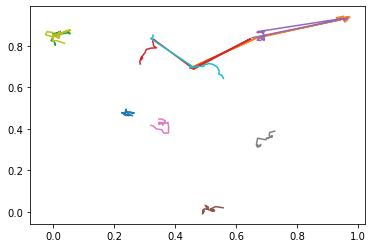

In [10]:
for trck in tracks:
    plt.plot(trck.x,trck.y)

### Track visualization with napari
note: if you run this with python 3.9, you need to use an specific version of networkx to be ```conda install -c conda-forge networkx=2.5```

In [5]:
import napari
viewer = napari.Viewer()
viewer.add_tracks(data, properties=properties, graph=graph)

/home/jeromeb/miniconda3/envs/imaging/lib/python3.9/site-packages/napari/_vispy/vispy_camera.py:109: RuntimeWarning: divide by zero encountered in true_divide
  zoom = np.min(canvas_size / scale)


<Tracks layer 'data' at 0x7f90ec707430>

## Tracking with trackpy

http://soft-matter.github.io/trackpy/v0.5.0/
